In [180]:
import pandas as pd
import numpy as np
from math import sqrt
from matplotlib import pyplot
import pandas as pd
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam 
from keras import regularizers

In [181]:
data = pd.read_csv('D:\\humana case competition\\raw data\\2022_Competition_Training.csv')

C:\Users\vivia\AppData\Local\Temp\ipykernel_2584\1287220459.py:1: DtypeWarning: Columns (760) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('D:\\humana case competition\\raw data\\2022_Competition_Training.csv')


In [182]:
dictionary = pd.read_excel('D:\humana case competition\Humana_Mays_2022_DataDictionary.xlsx', sheet_name = 'Data Dictionary')

# 1.Data Cleaning

### 1.1 Type conversion - change all numeric columns to numeric based on dictionary

In [183]:
data_type = dictionary['Data Type']
feature_name = dictionary['Feature name']
numeric_name = dictionary[dictionary['Data Type']!= 'string']['Feature name']
len(numeric_name.tolist())
numeric_name = [item.strip() for item in numeric_name]

In [184]:
column_names = list(data.columns.values)

In [185]:
for col in column_names:
    if col in numeric_name:
        data[col] = pd.to_numeric(data[col])
# for col in numeric_name:
#     print(data[col].dtype)   

In [186]:
data['cms_race_cd']=data['cms_race_cd'].astype(str)

### 1.2 Drop columns when all values are zero -> 766 columns left 

In [187]:
total_row=data.shape[0]
def check_zero(df,column_name):
    count_zero = (df[column_name] == 0.0).sum()
    percentage = count_zero/total_row
    return percentage 
for col in data.columns:
        if check_zero(data, col) == 1:
            data = data.drop(col, axis=1)    

In [188]:
data.shape

(48300, 766)

### 1.3 Drop columns when std = 0 (all values are same)  -> 670 columns left 

In [189]:
#1.3 Drop columns when std = 0 (all values are same) 
i = 0
drop_list = []
for col in list(data.columns.values):
    if data[col].dtype != 'object':
        if data[col].std()==0.0:
            drop_list.append(col)
            i = i + 1

data = data.drop(drop_list, axis = 1)
len(data.columns)

670

### 1.4 Create dummy columns for strings columns

In [190]:
string_name = dictionary[dictionary['Data Type']== 'string']['Feature name'].tolist()

In [191]:
for i in string_name:
    print(data[i].dtype)

object
object
object
float64
object
object
object
object


In [192]:
data_with_dummy = pd.get_dummies(data, columns=string_name)

In [193]:
len(data_with_dummy.columns.values) # after adding dummies the column added to 712

705

### 1.5 Drop columns with 90% missing value

In [194]:
missing = ["nan", "*", "", " ", "null"] # replace these values with np.nan
data_with_dummy = data_with_dummy.replace(missing, np.nan)

In [195]:
data_with_dummy = data_with_dummy.loc[:, data_with_dummy.isnull().mean() < 0.5]
len(data_with_dummy.columns)

693

In [197]:
data_with_dummy.to_csv("D:\humana case competition\clean_data.csv") 

,id,rx_hum_19_pmpm_cost,cmsd2_can_mal_male_genital_pmpm_ct,cmsd2_inj_surgical_pmpm_ct,cci_chf_pmpm_ct,rx_phar_cat_safeway_pmpm_ct,cmsd2_ext_car_pmpm_ct,cmsd2_dig_liver_pmpm_ct,cmsd2_mus_arthropath_pmpm_ct,rx_hum_28_pmpm_ct,...,rucc_category_8-Nonmetro,rucc_category_9-Nonmetro,cms_race_cd_*,cms_race_cd_0,cms_race_cd_1,cms_race_cd_2,cms_race_cd_3,cms_race_cd_4,cms_race_cd_5,cms_race_cd_6
0,100039218.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0,0,0,0,1,0,0,0,0,0
1,100042427.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0,0,0,0,0,0,0,0,0,1
2,100055103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0,0,0,0,1,0,0,0,0,0
3,100074556.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0,0,0,0,0,1,0,0,0,0
4,100079932.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48295,999894944.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.16,...,0,1,0,0,1,0,0,0,0,0
48296,999918135.0,0.0,0.0,0.0,0.0,0.0,0.0,1.86,0.0,0.00,...,0,0,0,0,1,0,0,0,0,0
48297,999954890.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0,0,0,0,1,0,0,0,0,0
48298,999967770.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0,0,0,0,1,0,0,0,0,0


### 1.6 KNN imputation

In [198]:
df_knn=pd.read_csv("D:\humana case competition\clean_data.csv")

In [199]:
#this cell can cost half an hour, don't run it
# Imputing with KNNImputer

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# Define scaler to set values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)

# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)

In [48]:
df_knn_imputed.shape

(48300, 701)

In [200]:
df_knn_imputed.to_csv("D:\humana case competition\imputated data.csv")

In [5]:
#use this file to start with modeling
#KNN data cleaning
#We have already got the knn clean data and we drop cms_race_cd
df_knn_imputed=pd.read_csv('D:/humana case competition/imputated data.csv')

### Scaling

In [201]:
# Define scaler to set values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
df_knn_imputed = pd.DataFrame(scaler.fit_transform(df_knn_imputed), columns = df_knn_imputed.columns)

In [202]:
Y = df_knn_imputed['hi_flag']
test_set_column=df_knn_imputed.columns.values.tolist()[1:]
test_set_column.remove('hi_flag')
X = df_knn_imputed[test_set_column]

In [203]:
# split data into test set and training set
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)

In [204]:

# set a model
model = Sequential()  
#input--number of features    X.shape[0] number of observations
input = X.shape[1]  
model.add(Dense(units=1024,input_dim=input,activation='relu'))  
# Dropout randomly
model.add(Dropout(0.3))
# Dropout randomly
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(0.2))
# Dropout randomly
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=256,activation='relu'))


model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=64,activation='relu'))
# use sigmoid for the output
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])




In [205]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=2)
# train

history = model.fit(train_x, train_y, epochs=10, batch_size=128,
                    validation_data=(test_x, test_y))


Epoch 1/10
302/302 [==============================] - 13s 36ms/step - loss: 0.1783 - accuracy: 0.9532 - val_loss: 0.1677 - val_accuracy: 0.9565
Epoch 2/10
302/302 [==============================] - 10s 34ms/step - loss: 0.1675 - accuracy: 0.9561 - val_loss: 0.1707 - val_accuracy: 0.9565
Epoch 3/10
302/302 [==============================] - 11s 36ms/step - loss: 0.1635 - accuracy: 0.9561 - val_loss: 0.1660 - val_accuracy: 0.9565
Epoch 4/10
302/302 [==============================] - 10s 34ms/step - loss: 0.1646 - accuracy: 0.9561 - val_loss: 0.1667 - val_accuracy: 0.9565
Epoch 5/10
302/302 [==============================] - 11s 36ms/step - loss: 0.1600 - accuracy: 0.9561 - val_loss: 0.1714 - val_accuracy: 0.9565
Epoch 6/10
302/302 [==============================] - 11s 37ms/step - loss: 0.1606 - accuracy: 0.9561 - val_loss: 0.1683 - val_accuracy: 0.9565
Epoch 7/10
302/302 [==============================] - 11s 36ms/step - loss: 0.1588 - accuracy: 0.9561 - val_loss: 0.1794 - val_accuracy:

302/302 [==============================] - 2s 6ms/step
Test AUC: 0.704


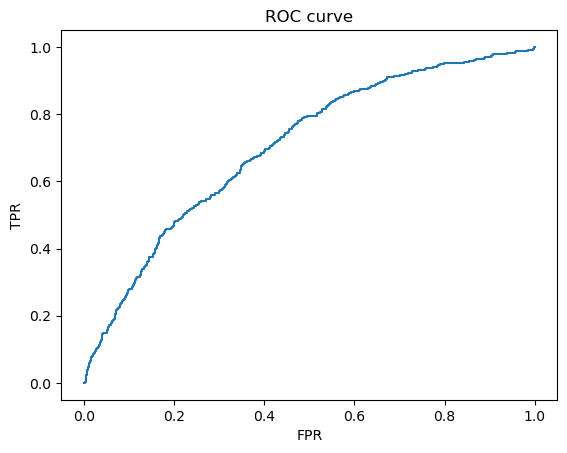

In [206]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
# loss curve
#pyplot.plot(history.history['loss'], label='train')
#pyplot.plot(history.history['val_loss'], label='test')
#pyplot.title('Model loss')
#pyplot.ylabel('Loss')
#pyplot.xlabel('Epoch')
#pyplot.legend()
#pyplot.show()
# prediction
yhat = model.predict(test_x)



# 原始y逆标准化
test_y = pd.DataFrame(test_y)

print('Test AUC: %.3f'%roc_auc_score(test_y, yhat))
fpr, tpr, _ = roc_curve(test_y, yhat)

pyplot.clf()
pyplot.plot(fpr, tpr)
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')
pyplot.title('ROC curve')
pyplot.show()


### holdout数据用model.predict()报错

In [207]:
#import the holdout to do prediction later
df_knn_test=pd.read_csv('D:/humana case competition/2022_Competition_Holdout.csv')

C:\Users\vivia\AppData\Local\Temp\ipykernel_2584\2400603257.py:2: DtypeWarning: Columns (760) have mixed types. Specify dtype option on import or set low_memory=False.
  df_knn_test=pd.read_csv('D:/humana case competition/2022_Competition_Holdout.csv')


In [208]:
column_names.remove('hi_flag')
for col in column_names:
    if col in numeric_name:
        df_knn_test[col] = pd.to_numeric(df_knn_test[col])

In [209]:
df_knn_test['cms_race_cd']=df_knn_test['cms_race_cd'].astype(str)

In [210]:
df_knn_test_dummy = pd.get_dummies(df_knn_test, columns=string_name)

In [211]:
df_knn_test_dummy=df_knn_test_dummy.fillna(df_knn_test_dummy.mean())

In [212]:
df_knn_test_dummy=df_knn_test_dummy[X.columns.values.tolist()]

In [213]:
y=model.predict(df_knn_test_dummy)

382/382 [==============================] - 2s 6ms/step


In [214]:
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)